In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df['life_expec'].sort_values()

66     32.1
87     46.5
31     47.5
166    52.0
94     53.1
       ... 
68     82.0
7      82.0
145    82.2
133    82.7
77     82.8
Name: life_expec, Length: 167, dtype: float64

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X = df.drop('country',axis =1)  
y = df['country']
st_sc = StandardScaler()
X_st = st_sc.fit_transform(X)
X_st[0][0]

1.2915323778422956

In [6]:
import seaborn as sns

<Axes: >

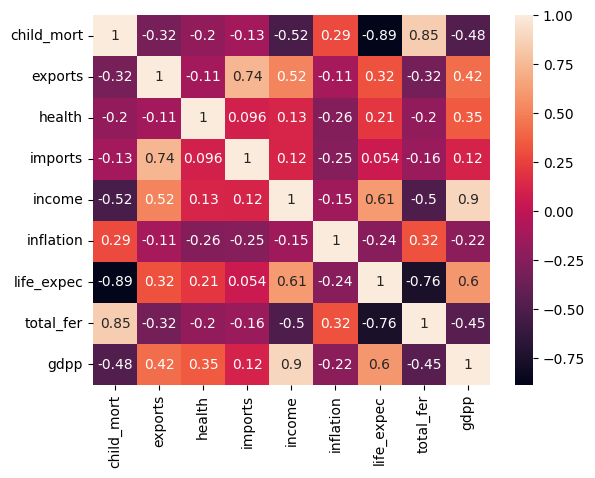

In [7]:
sns.heatmap(X.corr(), annot=True)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=0.9)
pca.fit(X_st)
len(pca.components_)

5

In [10]:
pca.explained_variance_ratio_[0]

0.45951739786095924

<Axes: >

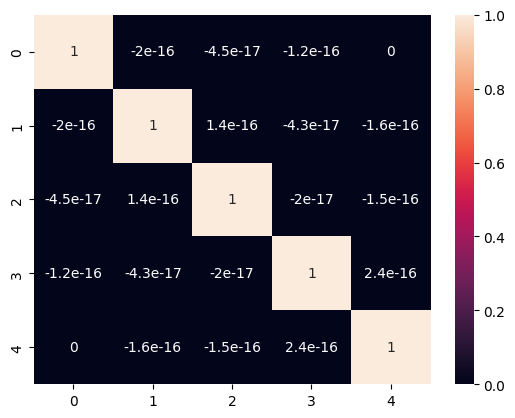

In [11]:
X_pca = pca.fit_transform(X_st)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True)

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(i, silhouette_avg)

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 0.3044199499231817
3 0.3079769786519015
4 0.3235154307362653
5 0.3255806324717655
6 0.2671181792769642
7 0.2256950938124907
8 0.24037703530553403
9 0.27436633921353193


c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packa

10 0.24031234938202223


In [14]:
silhouette_list = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1).fit(X_pca)
    y_pred = km.labels_
    sil_score = silhouette_score(X_pca, y_pred)
    silhouette_list.append((i, sil_score))
df_sil = pd.DataFrame(silhouette_list, columns=['cluster', 'sil_score'])
df_sil.sort_values(by='sil_score')    

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packa

,cluster,sil_score
5,7,0.225695
8,10,0.240312
6,8,0.240377
4,6,0.267118
7,9,0.274366
0,2,0.304420
1,3,0.307977
2,4,0.323515
3,5,0.325581


In [15]:
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_pca)
y_pred = km.labels_
df['cluster'] = km.labels_

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [17]:
import matplotlib as plt

<Axes: xlabel='cluster', ylabel='gdpp'>

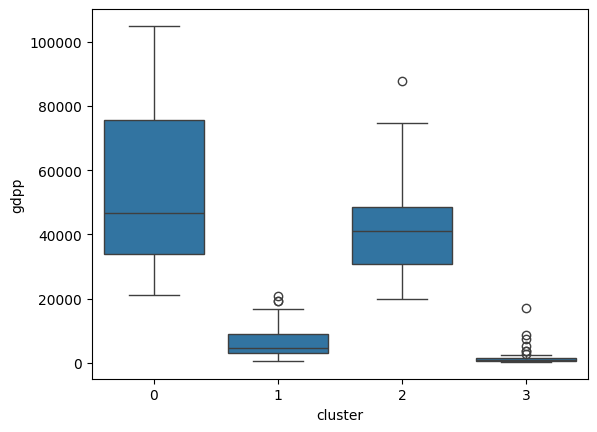

In [18]:
sns.boxplot(x='cluster', y='gdpp', data=df)

<Axes: xlabel='cluster', ylabel='child_mort'>

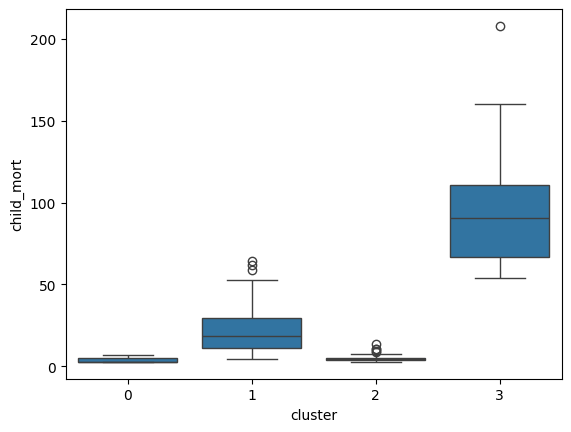

In [19]:
sns.boxplot(x='cluster', y='child_mort', data=df)

In [20]:
df.sort_values('child_mort', ascending=False).sort_values('gdpp').head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,3
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,3
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,3
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,3
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,3
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,3
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,3
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,3
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,3
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,3


In [21]:
K_Means_countries = df[df['cluster'] == 3]
K_Means_countries.sort_values(by = 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,3
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,3
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3
166,Zambia,83.1,37.00,5.89,30.9,3280,14.000,52.0,5.40,1460,3
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,3
137,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,3
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,3
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,3
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,3
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,3
